In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import graphviz
import time
df=pd.read_csv("C:/Users/MB20705/Desktop/data mining/adult.train.csv",names=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"])  



#刪除重複和問號的值
print("原始比數：",df.shape)
df.drop_duplicates(inplace=True)
print("刪除重複的值後：",df.shape)
df = df.replace(" ?", np.nan)
print("問號的值有幾筆",df[pd.isnull(df).any(axis=1)].shape)
df.dropna(inplace=True)
print("刪除空值：",df.shape)

df_X=df.drop(['hours-per-week'], axis=1)
outcome=list(df.columns[12:13])
df_y=df[outcome]


normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','education-num']
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
#y_columns=['hours-per-week']
#將類別資料轉成 labelencode
le = LabelEncoder()
for col in categorical_columns:
    df_X[col] = le.fit_transform(df_X[col])

def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df_X[columns] = scaler.fit_transform(df_X[columns])

normalize(normalize_columns)


print(df_X)  


原始比數： (32561, 15)
刪除重複的值後： (32537, 15)
問號的值有幾筆 (2398, 15)
刪除空值： (30139, 15)
            age  workclass    fnlwgt  education  education-num  \
0      0.042516          5 -1.062676          9       1.128996   
1      0.880215          4 -1.007829          9       1.128996   
2     -0.033639          2  0.244669         11      -0.440434   
3      1.108678          2  0.425206          1      -1.225149   
4     -0.795183          2  1.406572          9       1.128996   
...         ...        ...       ...        ...            ...   
32556 -0.871338          2  0.638926          7       0.736639   
32557  0.118670          2 -0.335246         11      -0.440434   
32558  1.489450          2 -0.358567         11      -0.440434   
32559 -1.252110          2  0.110688         11      -0.440434   
32560  1.032523          3  0.928780         11      -0.440434   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           0             1     4  

In [2]:
print(df_y)

       hours-per-week
0                  40
1                  13
2                  40
3                  40
4                  40
...               ...
32556              38
32557              40
32558              40
32559              20
32560              40

[30139 rows x 1 columns]


# KNeighborsRegressor

k=40，error最低

In [3]:
from sklearn.model_selection import train_test_split
X,y=df_X.values,df_y.values

test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1000)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt


model = SVR(kernel='linear')
model=model.fit(X_train,y_train.ravel())  #fit the model
pred=model.predict(X_test) #make prediction on test set
    #print(df_y[:5])
    #print(pred[:5])
error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value is:', error_RMSE)
print('MAE value is:', error_MAE)
print('MAPE value is:', error_MAPE)


In [ ]:
type(X_train)

numpy.ndarray

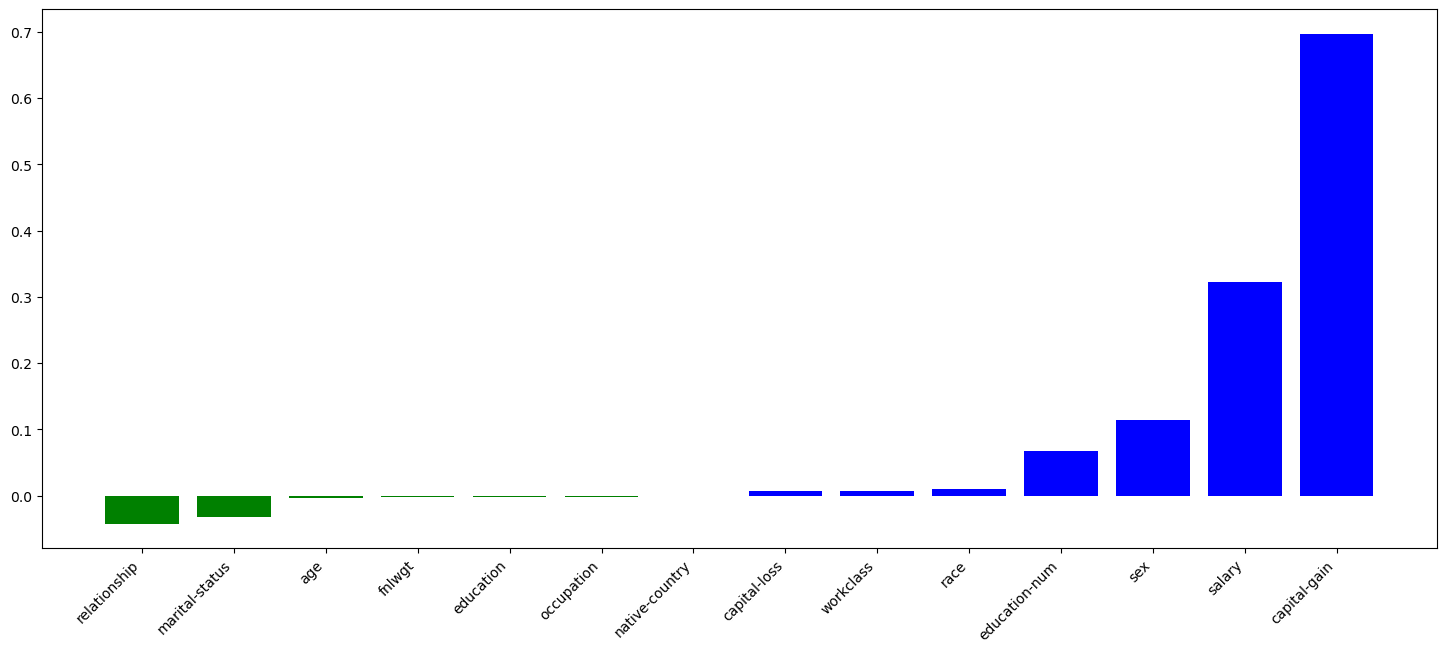

[-3.59966080e-03  7.90977935e-03 -2.08143058e-03 -1.94986371e-03
  6.79506352e-02 -3.15290052e-02 -1.25228421e-03 -4.21055384e-02
  9.81280361e-03  1.13612996e-01  6.96812886e-01  7.76962863e-03
 -6.77631501e-05  3.21831938e-01]
[ 7  5  0  2  3  6 12 11  1  8  4  9 13 10]
[11  1  8  4  9 13 10]
[ 7  5  0  2  3  6 12]


In [ ]:
import matplotlib.pyplot as plt

def feature_plot(classifier, feature_names, top_features=7):
 coef = classifier.coef_.ravel()
 top_coefficients=np.argsort(coef)
 #top_positive_coefficients = np.argsort(coef)[-top_features:]
 #top_negative_coefficients = np.argsort(coef)[:top_features]
 #top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18,7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange( 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

X_train_SVR=X_train
X_train_SVR=pd.DataFrame(X_train_SVR)
X_train_SVR.columns=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","native-country","salary"]

feature_plot(model, X_train_SVR.columns.values)

coef=model.coef_.ravel()
print(coef)
print(np.argsort(coef))
print(np.argsort(coef)[-7:])
print(np.argsort(coef)[:7])

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import graphviz
df=pd.read_csv("C:/Users/MB20705/Desktop/data mining/adult.test.csv",names=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"])  



#刪除重複和問號的值
df.drop_duplicates(inplace=True)
df = df.replace(" ?", np.nan)
print("重複的值有幾筆",df[pd.isnull(df).any(axis=1)].shape)
print("原始比數：",df.shape)
df.dropna(inplace=True)
print("刪除重複的值：",df.shape)

df_X=df.drop(['hours-per-week'], axis=1)
outcome=list(df.columns[12:13])
df_y=df[outcome]


normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','education-num']
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
#y_columns=['hours-per-week']
#將類別資料轉成 label encode
le = LabelEncoder()
for col in categorical_columns:
    df_X[col] = le.fit_transform(df_X[col])

def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df_X[columns] = scaler.fit_transform(df_X[columns])

normalize(normalize_columns)


X_train=pd.DataFrame(X_train)
X_train.columns = ["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","native-country","salary"]
df_X_cut=X_train.drop(['relationship'],axis=1)
df_X_cut=pd.DataFrame(df_X_cut)
#df_X_cut.columns = ["workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","native-country","salary"]
df_Xtest_cut=df_X.drop(['relationship'],axis=1)
#print(df_X_cut)
#df_X_cut=X_train.drop('age', axis=1)
#df_X_cut.shape()

#print(df_X)  
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
n_neighbors=40
model =SVR(kernel='linear')
model.fit(X_train,y_train)  #fit the model
pred=model.predict(df_X) #make prediction on test set
#print(df_y[:5])
#print(pred[:5])
error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value for k= ' , n_neighbors, 'is:', error_RMSE)
print('MAE value for k= ' , n_neighbors , 'is:', error_MAE)
print('MAPE value for k= ' , n_neighbors , 'is:', error_MAPE)



重複的值有幾筆 (1221, 15)
原始比數： (16276, 15)
刪除重複的值： (15055, 15)


c:\Users\MB20705\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


RMSE value for k=  40 is: 10.847624828602752
MAE value for k=  40 is: 7.376710395217536
MAPE value for k=  40 is: 0.2831099791396181


k=50

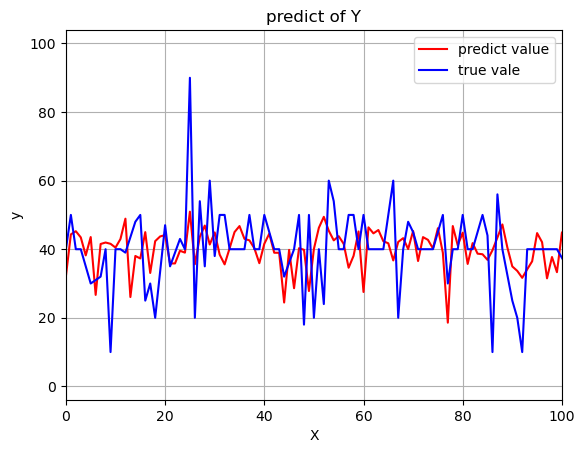

In [ ]:
act_y =df_y
pre_y =pred
plt.plot(pre_y, label='predict value',color='red')
plt.plot(act_y, label='true vale',color='blue')
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 100])
plt.grid(True)
plt.legend()
plt.show()

 # RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,21,1):
   model = RandomForestRegressor(max_depth=i, random_state=0)
   model.fit(X_train,y_train.ravel())  #fit the model
   pred=model.predict(X_test) #make prediction on test set
   #print(df_y[:5])
   #print(pred[:5])
   error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
   
   print('RMSE value for max_depth= ' , i , 'is:', error)

RMSE value for max_depth=  1 is: 11.51251729509425
RMSE value for max_depth=  2 is: 11.237909512486315
RMSE value for max_depth=  3 is: 10.937003581043347
RMSE value for max_depth=  4 is: 10.796630663206907
RMSE value for max_depth=  5 is: 10.703328809479748
RMSE value for max_depth=  6 is: 10.606881378873885
RMSE value for max_depth=  7 is: 10.543049052952231
RMSE value for max_depth=  8 is: 10.499119468588416
RMSE value for max_depth=  9 is: 10.47609937903136
RMSE value for max_depth=  10 is: 10.469398209670974
RMSE value for max_depth=  11 is: 10.477652487248779
RMSE value for max_depth=  12 is: 10.489973947449798
RMSE value for max_depth=  13 is: 10.513371945958914
RMSE value for max_depth=  14 is: 10.54995078449948
RMSE value for max_depth=  15 is: 10.576521141131016
RMSE value for max_depth=  16 is: 10.616187836159073
RMSE value for max_depth=  17 is: 10.649804763239162
RMSE value for max_depth=  18 is: 10.677656145531817
RMSE value for max_depth=  19 is: 10.712049519271963
RMSE 

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
start=time.time()
model = RandomForestRegressor(max_depth=10, random_state=0)
model.fit(X_train,y_train.ravel())  #fit the model
pred=model.predict(df_X) #make prediction on test set
end=time.time()
#print(df_y[:5])
#print(pred[:5])
error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value for max_depth= ' , 10 , 'is:', error_RMSE)
print('MAE value for max_depth= ' , 10 , 'is:', error_MAE)
print('MAPE value for max_depth= ' , 10 , 'is:', error_MAPE)
print('執行時間:',end-start)

c:\Users\MB20705\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


RMSE value for max_depth=  10 is: 10.462671107432731
MAE value for max_depth=  10 is: 7.044595489010744
MAPE value for max_depth=  10 is: 0.26373531617862417
執行時間: 5.938330411911011


In [ ]:
act_y =df_y
pre_y =pred
plt.plot(pre_y, label='predict value',color='red')
plt.plot(act_y, label='true vale',color='blue')
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 100])
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#經過one hot 所以特徵有變多
xfeatures=list(df_X.columns[:])  
importances = list(model.feature_importances_)
df_importance = pd.DataFrame({'feature':xfeatures,'feature_importance':importances})
df_importance = df_importance.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
print("每個特徵值的重要性：")
print(df_importance.loc[df_importance['feature_importance']!=0])

每個特徵值的重要性：
           feature  feature_importance
0              age            0.403778
1           fnlwgt            0.116139
2              sex            0.102780
3       occupation            0.075371
4        workclass            0.063217
5    education-num            0.051286
6           salary            0.041462
7        education            0.039909
8     relationship            0.037309
9   marital-status            0.018183
10    capital-gain            0.016724
11  native-country            0.013748
12            race            0.010734
13    capital-loss            0.009360


In [ ]:
X_train=pd.DataFrame(X_train)
X_train.columns = ["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","native-country","salary"]
df_X_cut=X_train.drop(['capital-loss'],axis=1)
df_X_cut=pd.DataFrame(df_X_cut)
#df_X_cut.columns = ["workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","native-country","salary"]
df_Xtest_cut=df_X.drop(['capital-loss'],axis=1)
#print(df_X_cut)
#df_X_cut=X_train.drop('age', axis=1)
#df_X_cut.shape()

In [ ]:

from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
start=time.time()
model = RandomForestRegressor(max_depth=11, random_state=0)
model.fit(df_X_cut,y_train.ravel())  #fit the model
pred=model.predict(df_Xtest_cut) #make prediction on test set
end=time.time()
#print(df_y[:5])
#print(pred[:5])
error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value for max_depth= ' , 11 , 'is:', error_RMSE)
print('MAE value for max_depth= ' , 11 , 'is:', error_MAE)
print('MAPE value for max_depth= ' , 11 , 'is:', error_MAPE)
print('執行時間:',end-start)

RMSE value for max_depth=  11 is: 10.47464896423243
MAE value for max_depth=  11 is: 7.055335404248737
MAPE value for max_depth=  11 is: 0.26357390806624126
執行時間: 5.733212947845459


# xgboost

In [ ]:
import xgboost as xgb

for i in range(1,11,1):
   # 建立 XGBRegressor 模型
   xgbrModel=xgb.XGBRegressor(max_depth=i,random_state=0)
   # 使用訓練資料訓練模型
   xgbrModel.fit(X_train,y_train)
   # 使用訓練資料預測
   pred=xgbrModel.predict(X_test)
   error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
   print('RMSE value for max_depth= ' , i , 'is:', error)

RMSE value for max_depth=  1 is: 10.607178412895781
RMSE value for max_depth=  2 is: 10.455875263711935
RMSE value for max_depth=  3 is: 10.441118623538534
RMSE value for max_depth=  4 is: 10.472221838214034
RMSE value for max_depth=  5 is: 10.55100482191165
RMSE value for max_depth=  6 is: 10.610758726818338
RMSE value for max_depth=  7 is: 10.698315330308102
RMSE value for max_depth=  8 is: 10.78772840374934
RMSE value for max_depth=  9 is: 10.987718747739802
RMSE value for max_depth=  10 is: 11.045660464634905


In [ ]:
import time
start=time.time()
# 建立 XGBRegressor 模型
xgbrModel=xgb.XGBRegressor(max_depth=3,random_state=0)
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
# 使用訓練資料預測


pred=xgbrModel.predict(df_X)
end=time.time()
error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value for max_depth= ' , 3 , 'is:', error_RMSE)
print('MAE value for max_depth= ' , 3 , 'is:', error_MAE)
print('MAPE value for max_depth= ' , 3 , 'is:', error_MAPE)

print("執行時間:",end-start)

RMSE value for max_depth=  3 is: 10.400935258430206
MAE value for max_depth=  3 is: 7.072707339324495
MAPE value for max_depth=  3 is: 0.26432150479066474
執行時間: 0.5573475360870361


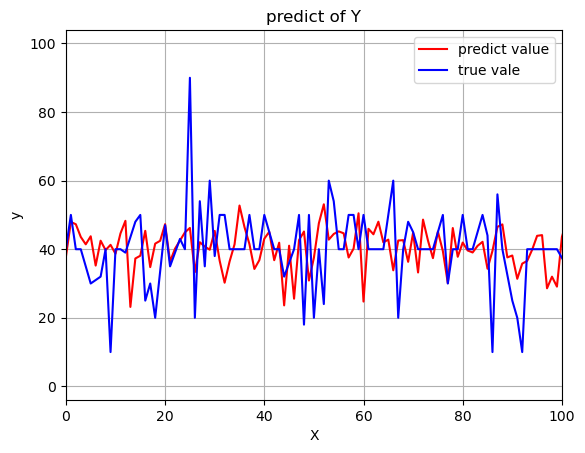

In [ ]:
act_y =df_y
pre_y =pred
plt.plot(pre_y, label='predict value',color='red')
plt.plot(act_y, label='true vale',color='blue')
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 100])
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
#經過one hot 所以特徵有變多
xfeatures=list(df_X.columns[:])  
importances = list(xgbrModel.feature_importances_)
df_importance = pd.DataFrame({'feature':xfeatures,'feature_importance':importances})
df_importance = df_importance.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
print("每個特徵值的重要性：")
print(df_importance.loc[df_importance['feature_importance']!=0])

每個特徵值的重要性：
           feature  feature_importance
0              sex            0.247098
1           salary            0.192482
2     relationship            0.157314
3              age            0.131083
4       occupation            0.047490
5        workclass            0.046999
6   marital-status            0.040221
7        education            0.034471
8    education-num            0.032430
9             race            0.017941
10    capital-gain            0.015601
11  native-country            0.012868
12    capital-loss            0.012010
13          fnlwgt            0.011990


In [ ]:
X_train=pd.DataFrame(X_train)
df_X_cut=X_train.drop(['fnlwgt','capital-loss','native-country','capital-gain','race','education-num','education','marital-status'],axis=1)
#df_X_cut=pd.DataFrame(df_X_cut)
df_Xtest_cut=df_X.drop(['fnlwgt','capital-loss','native-country','capital-gain','race','education-num','education','marital-status'],axis=1)

In [ ]:
import time
start=time.time()
# 建立 XGBRegressor 模型
xgbrModel=xgb.XGBRegressor(max_depth=3,random_state=0)
# 使用訓練資料訓練模型
xgbrModel.fit(df_X_cut,y_train)
# 使用訓練資料預測
pred=xgbrModel.predict(df_Xtest_cut)
end=time.time()
error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value for max_depth= ' , 3 , 'is:', error_RMSE)
print('MAE value for max_depth= ' , 3 , 'is:', error_MAE)
print('MAPE value for max_depth= ' , 3 , 'is:', error_MAPE)
print("執行時間:",end-start)

RMSE value for max_depth=  3 is: 10.390350338416582
MAE value for max_depth=  3 is: 7.061290774603533
MAPE value for max_depth=  3 is: 0.26383240757522614
執行時間: 0.30701661109924316
